In [9]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = layers.add([X, X_shortcut])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X

In [15]:
np.random.seed(1)  
  
# 创建随机输入数据  
X = np.random.randn(3, 4, 4, 6)  
  
# 直接使用 Python 变量作为输入，不再需要占位符  
A_prev = tf.constant(X)  
  
# 调用 identity_block 函数，假设它返回的是一个 TensorFlow tensor  
A = identity_block(A_prev, f=2, filters=[2, 4, 6], stage=1, block='a')  
  
# TensorFlow 2.0 不再需要显式初始化变量，因为变量会在第一次使用时自动初始化  
  
# 由于 TensorFlow 2.0 默认启用了即时执行，你可以直接获取张量的值  
out = A.numpy()  
  
# 打印输出  
print("out = " + str(out[1][1][0]))

out = [0.        0.        1.3454674 2.031818  0.        1.3246754]


ori number of training examples = (1080, 64, 64, 3)
ori number of test examples = (1, 1080)
ori number of training examples = (120, 64, 64, 3)
ori number of test examples = (1, 120)
ori classes shape: (6,)
number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)
hand: [0. 0. 0. 0. 0. 1.]


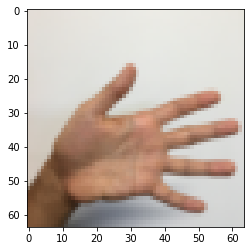

In [30]:
import h5py
import matplotlib.pyplot as plt

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

print ("ori number of training examples = " + str(X_train_orig.shape))
print ("ori number of test examples = " + str(Y_train_orig.shape))
print ("ori number of training examples = " + str(X_test_orig.shape))
print ("ori number of test examples = " + str(Y_test_orig.shape))
print ("ori classes shape: " + str(classes.shape))


# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

plt.imshow(X_train[0])
print("hand: "+str(Y_train[0]))

In [40]:
label = np.array([1,2])
L = label.reshape(-1)
C = np.eye(6)
print(L.shape)
print(C.shape)
print(C)
print(C[L].T)

(2,)
(6, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


hand: [0. 0. 1. 0. 0. 0.]
hand: [5 0 2 ... 2 4 5]


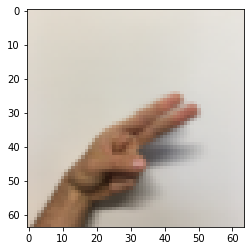

In [33]:
plt.imshow(X_train[2])
print("hand: "+str(Y_train[2]))
print("hand: "+str(Y_train_orig[0]))